# 1 Descargar un conjunto de datos, Crop_recommendation.csv1, para realizar el trabajo práctico

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
dataframe = pd.read_csv('Crop_recommendation.csv')
dataframe.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# 2 Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y elegir un método de estandarización.

### Buscamos valores faltantes
observamos que ninguna de las columnas tiene valores faltantes

In [3]:
dataframe.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### Vemos los tipos de datos
N P y K son valores enteros, temperatura, humedad, ph y lluvia son floats y label es un string

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Cuantas labels hay?
22

In [5]:
dataframe['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Distribuciones
viendo las distribuciones podemos apreciar que K presenta valores atipicos de los datos con valores enteros
N es asimetrica a la derecha
P es la mas distribuida normalmente

Text(0.5, 1.0, 'Distribucion de K')

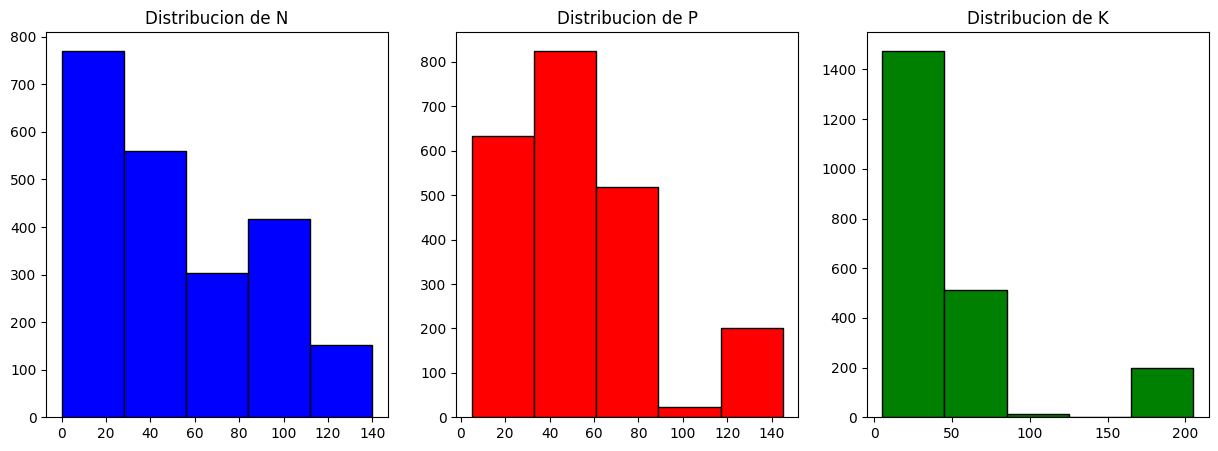

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(dataframe['N'], bins=5, color='blue', edgecolor='black')
plt.title('Distribucion de N')

plt.subplot(1, 3, 2)
plt.hist(dataframe['P'], bins=5, color='red', edgecolor='black')
plt.title('Distribucion de P')

plt.subplot(1, 3, 3)
plt.hist(dataframe['K'], bins=5, color='green', edgecolor='black')
plt.title('Distribucion de K')


<Axes: >

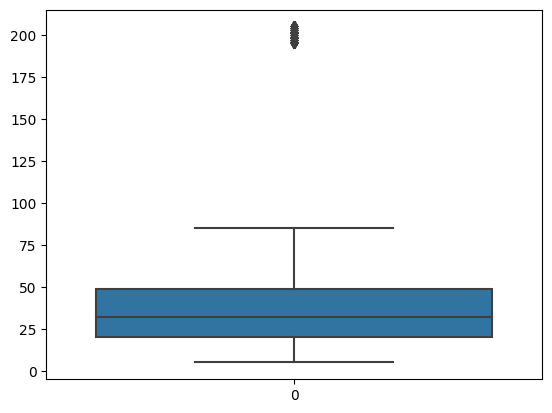

In [7]:
sns.boxplot(dataframe['K'])

### Distribuciones de las variabels float
Temperatura y ph estan distribuidas normalmente, mientras humidity y rainfall presentan una asimetria a la izquierda y derecha respectivamente

Text(0.5, 1.0, 'Distribucion de rainfall')

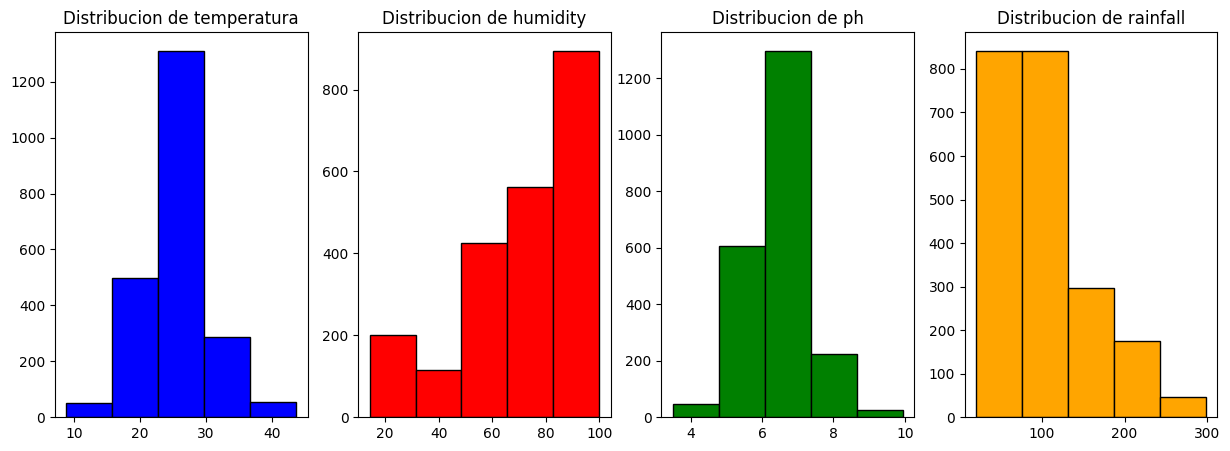

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.hist(dataframe['temperature'], bins=5, color='blue', edgecolor='black')
plt.title('Distribucion de temperatura')

plt.subplot(1, 4, 2)
plt.hist(dataframe['humidity'], bins=5, color='red', edgecolor='black')
plt.title('Distribucion de humidity')

plt.subplot(1, 4, 3)
plt.hist(dataframe['ph'], bins=5, color='green', edgecolor='black')
plt.title('Distribucion de ph')

plt.subplot(1, 4, 4)
plt.hist(dataframe['rainfall'], bins=5, color='orange', edgecolor='black')
plt.title('Distribucion de rainfall')

### Normalizar los datos mediante la tecnica de Z-Score

In [9]:
df_sub = dataframe[dataframe.describe().columns]

dataframe_escalado = (df_sub-df_sub.mean())/df_sub.std()

In [10]:
dataframe_escalado

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714
...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447


# 3 Realizar PCA y determinar el número de componentes principales considerando alguno de los 3 criterios datos en la práctica. Graficar la varianza acumulada y las componentes de PCA en un grafico 2 o 3D con sus respectivas clases.

In [11]:
from sklearn.decomposition import PCA

In [12]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1])

pca_features = pca.fit_transform(dataframe_escalado)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=df_sub.columns)


nuevos_nombres = {'N': 'PC1',
                  'P': 'PC2',
                  'K': 'PC3',
                  'temperature': 'PC4',
                  'humidity': 'PC5',
                  'ph': 'PC6',
                  'rainfall': 'PC7'}

pca_df.rename(columns=nuevos_nombres, inplace=True)

pca_df['label'] = dataframe['label']

In [13]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


In [14]:
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], 
             index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


### Funcion para la variancia acumulada

In [15]:
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [16]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


En el caso de aplicar el criterio de los eigenvalores mayores a uno tomaria las 4 primeras componentes

Teniendo en cuenta la variancia acumulada tomariamos las 4 primeras tambien

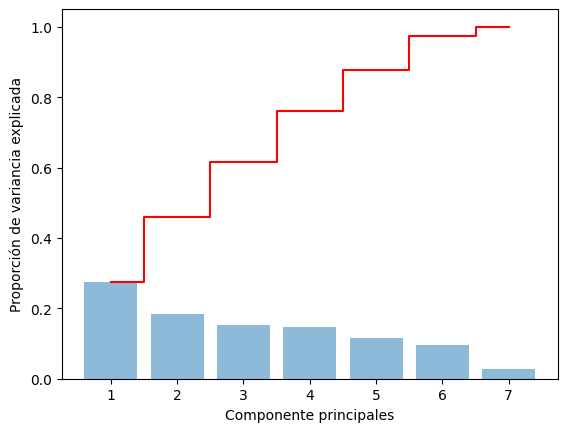

In [17]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

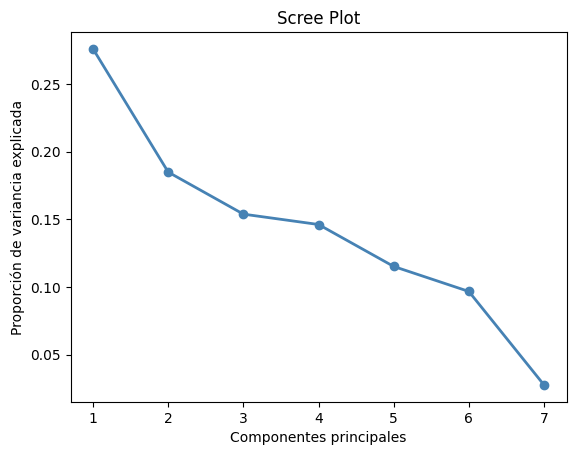

In [18]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

### Corroboramos que el calculo de nuestros PC's es correcto (deben ser ortogonales)

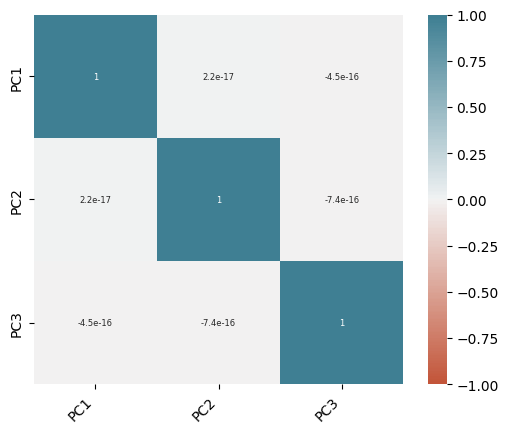

In [19]:
corr = pca_df[['PC1', 'PC2', 'PC3']].corr()

#corr = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']].corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [22]:
import plotly.express as px

In [29]:
features = dataframe.drop(columns=['label']).columns.to_list()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_df["label"],  labels={'color': 'class'})
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*4.5,
        y1=loadings[i, 1]*4.5
    )
    fig.add_annotation(
        x=loadings[i, 0]*5.5,
        y=loadings[i, 1]*5.5,
        ax=0, ay=0,
        xanchor='center',
        yanchor='bottom',
        text=feature,
    )
fig.update_layout(title = "Biplot",width = 1200,height = 600)
fig.show()
fig = px.scatter(pca_features, x=0, y=1,
              color=pca_df["label"],  labels={'color': 'class'})
fig.show()

### Isomap

In [31]:
from sklearn.manifold import Isomap

Isomap busca mantener las distancias geodesicas (distancia minima entre dos puntos en una superficie, una linea recta (como desenrrollar un papel))

Funciona estableciendo vecinos entre los valores del conjunto de datos y busca una representacion euclideana

estas distancias geodesicas entre los puntos van conformando un grafo y es un problema de distancia (dijkstra o bellman ford)

In [34]:
isomap_df = Isomap(n_neighbors=6, n_components=3)
isomap_df.fit(dataframe_escalado)
projections_isomap = isomap_df.transform(dataframe_escalado)
#scatter_3d
fig = px.scatter(
    projections_isomap, x=0, y=1, #z=2
    color=dataframe['label'], labels={'color': 'class'}
)
fig.update_traces(marker_size=5)
fig.show()

c:\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Python311\Lib\site-packages\scipy\

### T-SNE

In [35]:
from sklearn.manifold import TSNE

In [36]:
tsne = TSNE(n_components=2, random_state=0, perplexity=50)
projections_tsne = tsne.fit_transform(dataframe_escalado, )

fig = px.scatter(
    projections_tsne, x=0, y=1, #z=2,
    color=dataframe['label'], labels={'color': 'class'}
)
fig.update_traces(marker_size=5)
fig.show()